In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import random

from os import listdir
from os.path import isfile, join

%matplotlib inline

In [2]:
def get_hist(image):
    """
    Uses numpy to obtain the histogram of the intensity values of an image as an array. Also returns the midpoints of the bins.
    
    Parameters
    ---------------------
    image : ndarray
        The image we want to obtain the histogram of.
    
    Returns 
    ---------------------
    hist : 1d array
        256 element array containing counts of each intensity value from 0 to 255
    mids: 1d array
        256 element array containing the midpoints of each bin ie. [0.5, 1.5, 2.5,.....]
    """
    hist, bins = np.histogram(img.ravel(), 256, [0, 256]) #obtain histogram using numpy
    mids = (bins[1:] + bins[:-1]) / 2 #find midpoints of each bin
    
    return hist, mids

In [3]:
def plot_random_hist(file_list, nrows, ncolumns):
    """
    Plots the histograms of a random sample of the images found in file_list on a grid of subplots. 
    
    Parameters
    -----------------------------------
    file_list : list of strings
        List containing name of image files
    nrows : int
        Number of rows in subplot grid
    ncolumns : int
        Number of columns in subplot grid
    
    NOTE 
    ------------------------------------------
    Random sample can have repeats of same file
    """
    rand_list = random.choices(file_list, k = nrows * ncolumns) #creates random sample of files (can have repeats)
    img_list = [mpimg.imread(file) for file in rand_list] #loads images as arrays
    
    #Creates histogram plots
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.hist(img_list[i].ravel(), 256, [0, 256])

In [4]:
def plot_random(file_list, nrows, ncolumns):
    """
    Shows a random sample of images found in file_list on a grid of subplots.
    
    Parameters
    ------------------------------------------
    file_list : list of strings
        List containig name of image files
    nrows : int
        Number of rows in subplot grid
    ncolumns : int
        Number of columns in subplot grid
        
    NOTE
    -------------------------------------------------
    Random sample can have repeats of same file
    """
    rand_list = random.choices(file_list, k = nrows * ncolumns) #creates random sample of files (can have repeats)
    img_list = [mpimg.imread(file) for file in rand_list] #loads images as arrays
    
    #Show images in subplots
    fig, ax = plt.subplots(nrows, ncolumns, figsize = (14, 12))
    for i, axis in enumerate(ax.ravel()):
        axis.imshow(img_list[i])

In [5]:
mypath = r'Particles' #directory name
file_list = [f'{mypath}\{i}' for i in listdir(mypath) if isfile(join(mypath, i))] #extracts all files from directory into a list

print (f'num files = {len(file_list)}')

num files = 3905


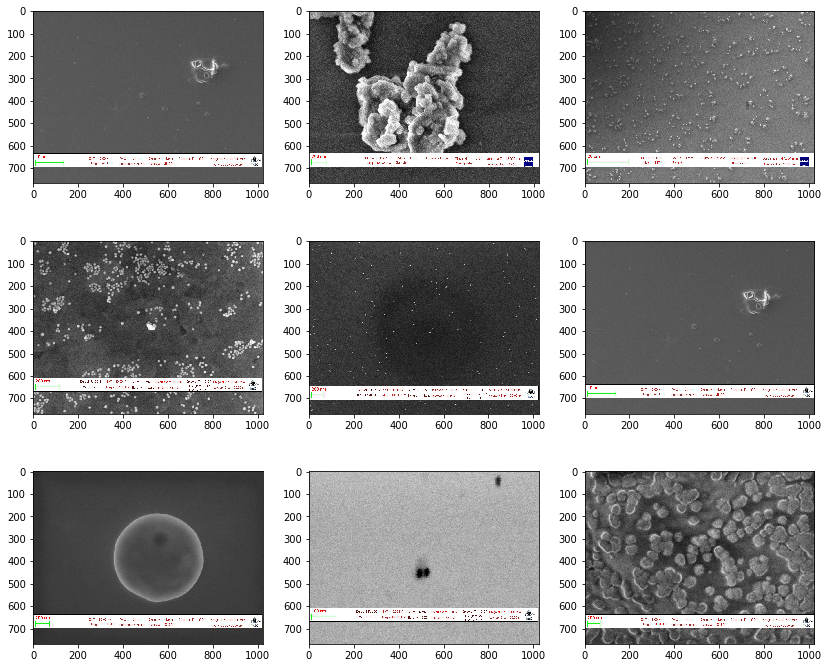

In [6]:
plot_random(file_list, 3, 3) #Show random assortment of images from the directory

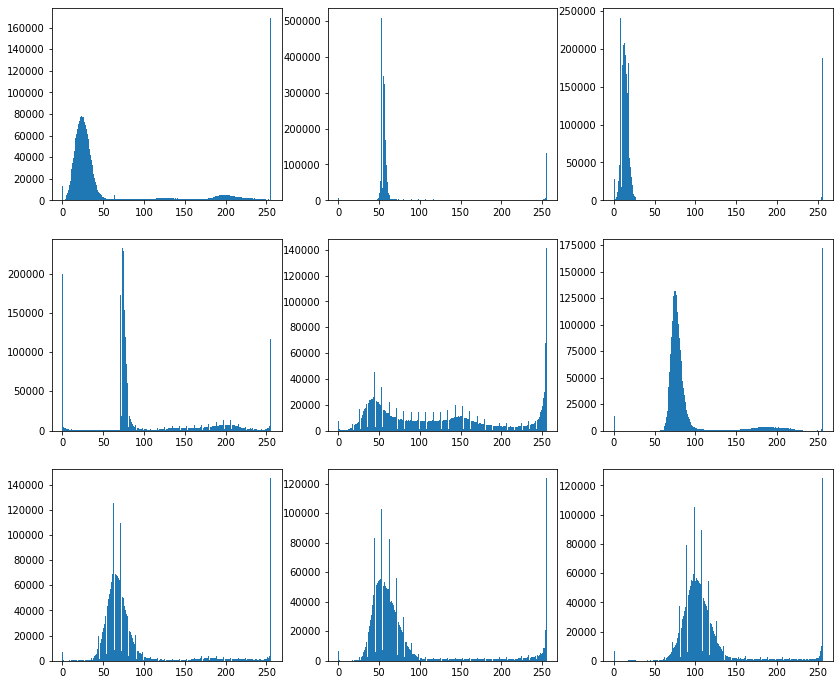

In [7]:
plot_random_hist(file_list, 3, 3) #show random assortment of intensity histograms from directory
                                  #histograms displayed do not correspond to images shown in previous cell

In [8]:
img_list = [mpimg.imread(file) for file in file_list] #load up all files into a list of ndarrays

#Find mean and standard deviation of the intensity for all images and put them into a list
mean_list, std_list = [], []
for img in img_list:
    #obtain histogram as 1darray and midpoints of the bins
    hist, mids = get_hist(img)
    
    #get mean and standard deviation from the histogram
    hist_mean = np.average(mids, weights = hist)
    hist_std = np.sqrt(np.average((mids - hist_mean) ** 2, weights = hist))
    
    #put the values into a list
    mean_list.append(int(hist_mean))
    std_list.append(int(hist_std))

In [15]:
#convert lists into arrays for easier calculations
mean_array = np.array(mean_list)
std_array = np.array(std_list)

print (f'average mean from histogram = {mean_array.mean()}')
print (f'average std from histogram = {mean_array.std()}')

average mean from histogram = 90.69654289372599
average std from histogram = 41.21104423944846


In [21]:
#Find outliers in the mean
#If the difference between the mean of an image (mean_i) and the average mean of all images (mean_array.mean()) 
#is greater than a specified threshold, then the image is considered an outlier. The specified threshold in this case
#is triple the standard deviation of the mean_array (mean_array.std())
mean_outliers = []
for i, mean_i in enumerate(mean_array):
    if np.abs(mean_i - mean_array.mean()) > (3 * mean_array.std()):
        print (f'index = {i}, mean = {mean_i}')
        mean_outliers.append(file_list[i])
print (f'\nnum outliers = {len(mean_outliers)}')

index = 5, mean = 235
index = 20, mean = 236
index = 173, mean = 225
index = 254, mean = 227
index = 468, mean = 232
index = 709, mean = 232
index = 874, mean = 239
index = 1146, mean = 234
index = 1300, mean = 234
index = 1345, mean = 231
index = 1370, mean = 226
index = 1476, mean = 226
index = 1527, mean = 227
index = 1578, mean = 242
index = 1601, mean = 232
index = 1627, mean = 232
index = 1645, mean = 232
index = 1674, mean = 226
index = 1761, mean = 227
index = 1772, mean = 222
index = 1888, mean = 226
index = 2331, mean = 237
index = 2471, mean = 235
index = 2658, mean = 232
index = 2968, mean = 215
index = 3073, mean = 224
index = 3130, mean = 232
index = 3163, mean = 231
index = 3218, mean = 226
index = 3384, mean = 234
index = 3414, mean = 231
index = 3600, mean = 232
index = 3683, mean = 235
index = 3684, mean = 234
index = 3714, mean = 219

num outliers = 35


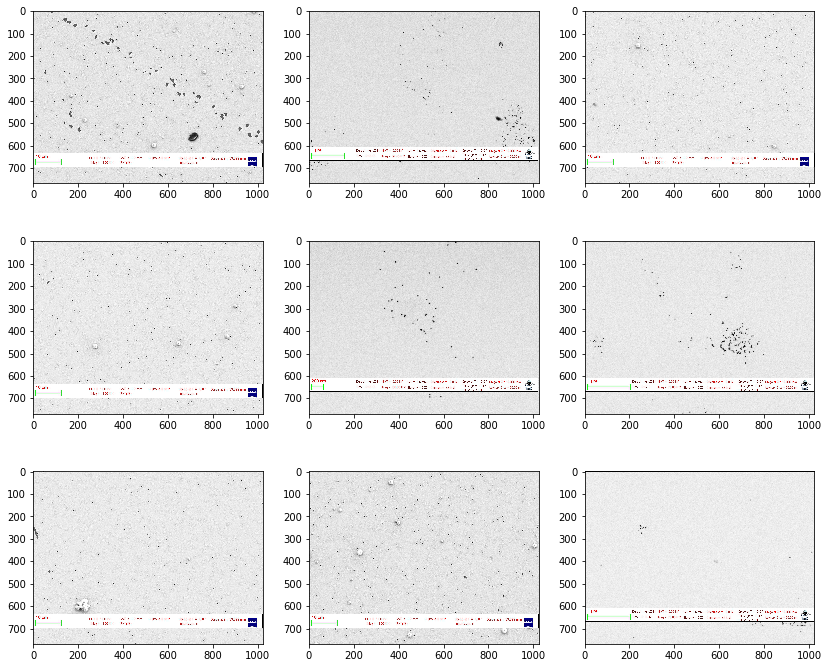

In [28]:
#Show the outliers in a grid of subplots. If the number of outliers is greater than 18, 
#only show a random sample of the images
if len(mean_outliers) < 18:
    fig, ax = plt.subplots(int(np.ceil(len(mean_outliers) / 3)), 3, figsize = (18, 16)) #create a grid with 3 columns and up to 6 rows
    for i, axis in enumerate(ax.ravel()):
        image = mpimg.imread(mean_outliers[i])
        axis.imshow(image)
else: 
    plot_random(mean_outliers, 3, 3)

In [24]:
#Find outliers in the standard deviation
#If the difference between the standard deviation of an image (std_i) and the average standard deviation of all images 
#(std_array.mean()) is greater than a specified threshold, then the image is considered an outlier. The specified threshold 
#in this case is triple the standard deviation of the std_array (std_array.std())
std_outliers = []
for i, std_i in enumerate(std_array):
    if np.abs(std_i - std_array.mean()) > (3 * std_array.std()):
        print (f'index = {i}, std = {std_i}')
        std_outliers.append(file_list[i])
print (f'\nnum outliers = {len(std_outliers)}')

index = 379, std = 94
index = 567, std = 95
index = 869, std = 92
index = 969, std = 8
index = 1073, std = 98
index = 1134, std = 94
index = 1292, std = 14
index = 1797, std = 12
index = 1804, std = 14
index = 1998, std = 93
index = 2236, std = 14
index = 2356, std = 105
index = 2470, std = 15
index = 2605, std = 92
index = 2611, std = 95
index = 2663, std = 101
index = 2823, std = 7
index = 2985, std = 97
index = 3493, std = 13
index = 3606, std = 7
index = 3696, std = 7

num outliers = 21


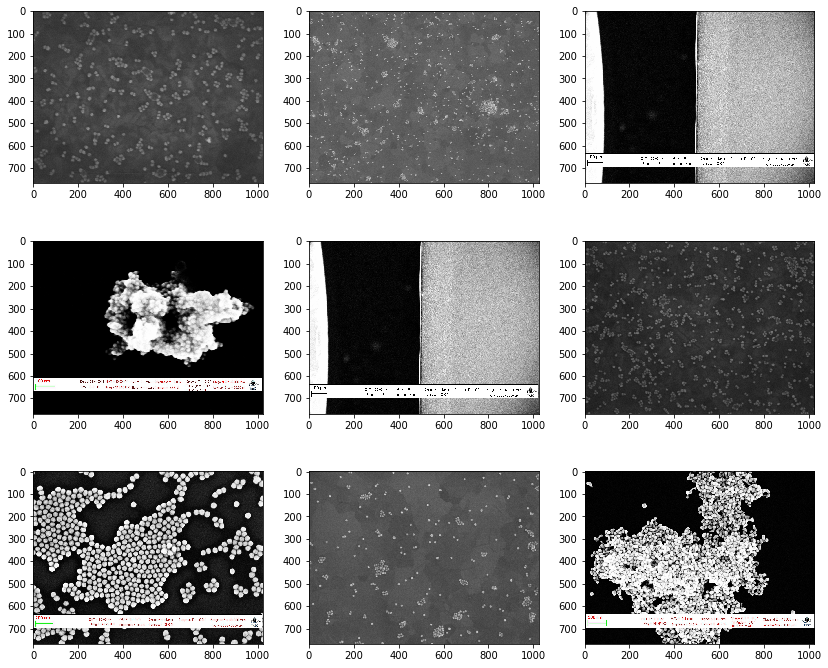

In [25]:
#Show the outliers in a grid of subplots. If the number of outliers is greater than 18, 
#only show a random sample of the images
if len(std_outliers) < 18:
    fig, ax = plt.subplots(int(np.ceil(len(std_outliers) / 3)), 3, figsize = (18, 16)) #create a grid with 3 columns and up to 6 rows
    for i, axis in enumerate(ax.ravel()):
        image = mpimg.imread(std_outliers[i])
        axis.imshow(image)
else: 
    plot_random(std_outliers, 3, 3)